In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras import Sequential
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
# 1. Load EMNIST Letters
print("Loading dataset...")
ds, info = tfds.load('emnist/letters', split=['train', 'test'], as_supervised=True, with_info=True)

def prepare_data(dataset, limit=20000): # Limit to 20k for speed in Logistic Regression
  images, labels = [], []
  for img, lab in tfds.as_numpy(dataset.take(limit)):
      images.append(img.flatten() / 255.0) # Flatten 28x28 -> 784
      labels.append(lab - 1) # 1-26 -> 0-25
  return np.array(images), np.array(labels)

X_train, y_train = prepare_data(ds[0])
X_test, y_test = prepare_data(ds[1], limit=5000)

label_map = {i: chr(ord('A') + i) for i in range(26)}

Loading dataset...


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/emnist/letters/incomplete.JYB9FS_3.1.0/emnist-train.tfrecord*...:   0%|   …

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/emnist/letters/incomplete.JYB9FS_3.1.0/emnist-test.tfrecord*...:   0%|    …

Dataset emnist downloaded and prepared to /root/tensorflow_datasets/emnist/letters/3.1.0. Subsequent calls will reuse this data.


In [3]:
# --- 1. Logistic Regression (Basic Linear ML) ---
print("Training Logistic Regression...")
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
lr_acc = accuracy_score(y_test, lr_model.predict(X_test))
lr_acc

Training Logistic Regression...


0.671

In [4]:
# --- 3. Sequential ANN (Neural Network) ---
print("Training Sequential ANN...")
ann_model = Sequential([
  Dense(256, activation='relu', input_shape=(784,)),
  Dropout(0.2),
  Dense(128, activation='relu'),
  Dense(26, activation='softmax')
])
ann_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
ann_model.fit(X_train, y_train, epochs=100, batch_size=128, verbose=1)

Training Sequential ANN...
Epoch 1/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.4258 - loss: 2.0663
Epoch 2/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7242 - loss: 0.9344
Epoch 3/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7852 - loss: 0.7025
Epoch 4/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8177 - loss: 0.5863
Epoch 5/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8403 - loss: 0.5120
Epoch 6/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8555 - loss: 0.4544
Epoch 7/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8638 - loss: 0.4082
Epoch 8/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8820 - loss: 0.3668
Epoch 9/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8894 - loss: 0.3433
Epoch 10/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8972 - loss: 0.3032
Epoch 11/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9070 - loss: 0.2786
Epoch 12/100


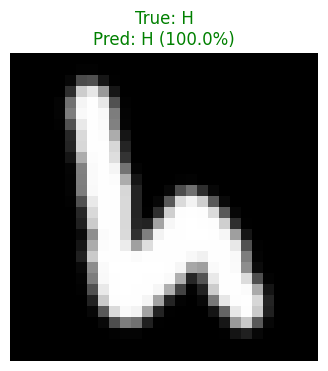

In [14]:
def predict_random_image():
    # Pick a random index from test set
    idx = np.random.randint(0, len(X_test))
    test_img = X_test[idx]
    true_label = y_test[idx]

    # ANN Prediction
    # Reshape for the model: (1 sample, 784 features)
    prediction_probs = ann_model.predict(test_img.reshape(1, 784), verbose=0)
    predicted_idx = np.argmax(prediction_probs)
    confidence = np.max(prediction_probs) * 100

    # Visualization
    plt.figure(figsize=(4,4))
    # Note: EMNIST images are transposed, .T fixes it
    plt.imshow(test_img.reshape(28, 28).T, cmap='gray')

    color = 'green' if predicted_idx == true_label else 'red'
    plt.title(f"True: {label_map[true_label]}\nPred: {label_map[predicted_idx]} ({confidence:.1f}%)", color=color)
    plt.axis('off')
    plt.show()

# Run the function
predict_random_image()
